In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
upload = files.upload()

Saving matches.csv to matches.csv


In [21]:
#Reading the data
df = pd.read_csv('/content/matches.csv')

#Cleaning the data
df.isnull()
df.dropna(inplace = True)
print(df.isnull().sum())
print(df.duplicated().sum())
df['date'] = pd.to_datetime(df['date'])
df.columns = df.columns.str.replace(' ','_')
print(df.head())

id                 0
season             0
city               0
date               0
match_type         0
player_of_match    0
venue              0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
target_runs        0
target_overs       0
super_over         0
method             0
umpire1            0
umpire2            0
dtype: int64
0
        id   season       city       date match_type   player_of_match  \
38  336022  2007/08      Delhi 2008-05-17     League  DPMD Jayawardene   
41  336025  2007/08    Kolkata 2008-05-18     League           M Ntini   
60  392183     2009  Cape Town 2009-04-19     League        DL Vettori   
63  392186     2009     Durban 2009-04-21     League          CH Gayle   
89  392214     2009  Centurion 2009-05-07     League         ML Hayden   

               venue                  team1                  team2  \
38  Feroz Shah Kotla       Delhi Daredevils       

In [25]:
print(df.info())
print(df.shape)
print(df.describe())
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month_name()


<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 38 to 1023
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               21 non-null     int64         
 1   season           21 non-null     object        
 2   city             21 non-null     object        
 3   date             21 non-null     datetime64[ns]
 4   match_type       21 non-null     object        
 5   player_of_match  21 non-null     object        
 6   venue            21 non-null     object        
 7   team1            21 non-null     object        
 8   team2            21 non-null     object        
 9   toss_winner      21 non-null     object        
 10  toss_decision    21 non-null     object        
 11  winner           21 non-null     object        
 12  result           21 non-null     object        
 13  result_margin    21 non-null     float64       
 14  target_runs      21 non-null     float64      

In [33]:
print(df.columns)

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2', 'Year', 'Month'],
      dtype='object')


11 out of 21 matches had the toss winner also win the match.


Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2', 'Year', 'Month'],
      dtype='object')

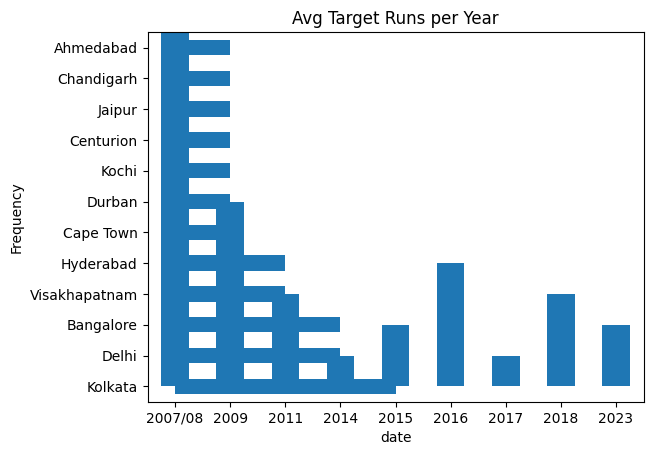

In [32]:
# Which team has won the most matches?
df['winner'].value_counts()
Winners = df.groupby('result_margin')[['team1','team2']].sum()
df['winner'].value_counts()

In [34]:
# Who has won the most ‘Player of the Match’ awards?
df['player_of_match'].value_counts().head()

,count
player_of_match,
V Kohli,2
CH Gayle,2
AB Dinda,2
DPMD Jayawardene,1
M Ntini,1


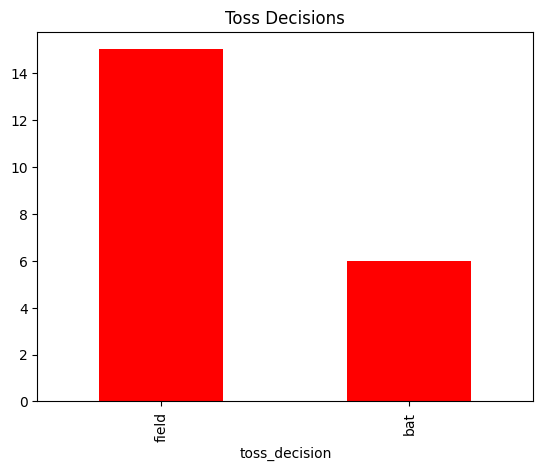

In [36]:
# Distribution of toss decisions (bat/field)?
df['toss_decision'].value_counts().plot(kind='bar', title='Toss Decisions',color = 'red')
plt.show()

<Axes: title={'center': 'Cities by Match Count'}, ylabel='city'>

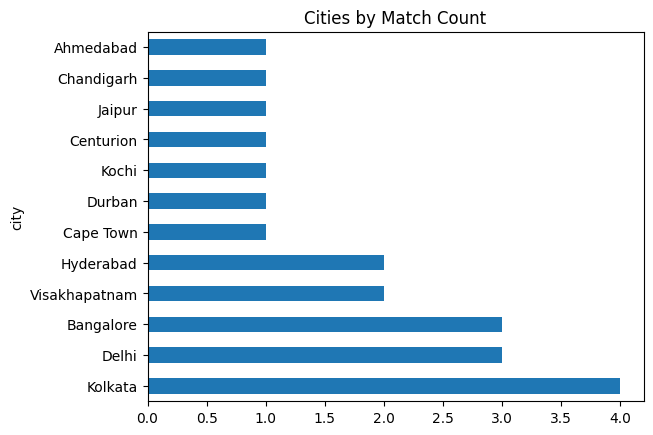

In [37]:
# Which city hosted the most matches?
df['city'].value_counts().plot(kind='barh', title='Cities by Match Count')

<Axes: title={'center': 'Matches per Season'}, xlabel='season'>

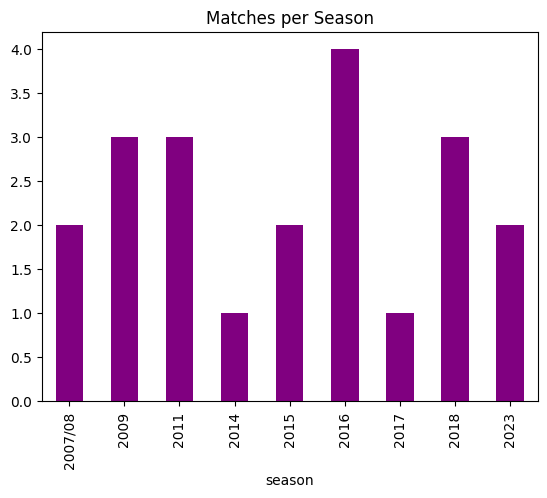

In [41]:
# Which seasons saw the most matches?
df['season'].value_counts().sort_index().plot(kind='bar', title='Matches per Season',color = 'purple')

In [44]:
# Is there any correlation between winning the toss and winning the match?
(df['toss_winner'] == df['winner']).value_counts()

,count
True,11
False,10


In [45]:
# Is there any correlation between winning the toss and winning the match?
same = (df['toss_winner'] == df['winner']).sum()
print(f"{same} out of {len(df)} matches had the toss winner also win the match.")

11 out of 21 matches had the toss winner also win the match.


In [46]:
# What are the highest and lowest result margins?
df['result_margin'].max(), df['result_margin'].min()

(82.0, 3.0)

<Axes: title={'center': 'Target Runs Distribution'}, ylabel='Frequency'>

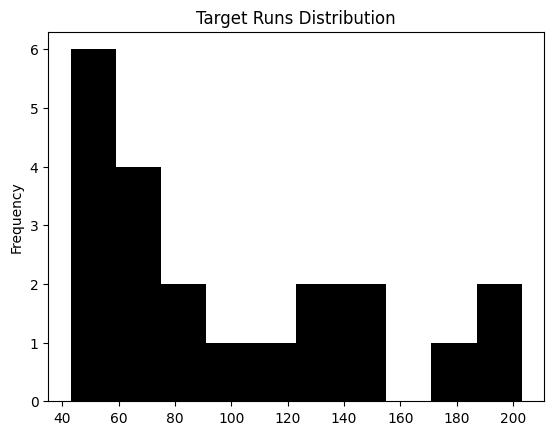

In [49]:
# Target score distribution and trend over the years?
df['target_runs'].plot(kind='hist', bins=10, title='Target Runs Distribution',color='black')

<Axes: title={'center': 'Avg Target Runs per Year'}, xlabel='date'>

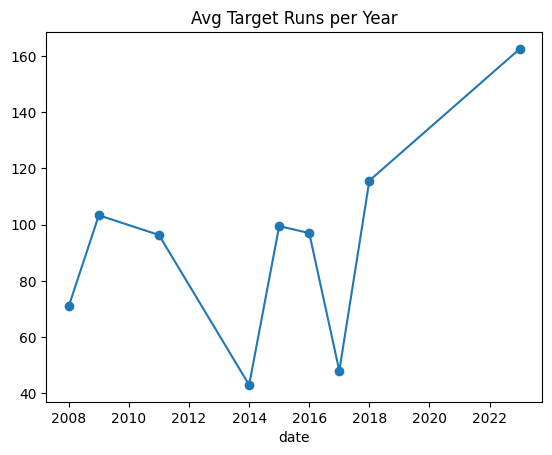

In [50]:
# Target score distribution and trend over the years?
df.groupby(df['date'].dt.year)['target_runs'].mean().plot(marker='o', title='Avg Target Runs per Year')


In [51]:
# Number of matches decided by Super Over?
df['super_over'].value_counts()

,count
super_over,
N,21


In [52]:
# Umpire frequency – who officiated the most?
df[['umpire1', 'umpire2']].stack().value_counts().head()

,count
Nitin Menon,4
BNJ Oxenford,3
RE Koertzen,2
Asad Rauf,2
DJ Harper,2


In [53]:
df.to_csv('IPL_match_Analysis.csv')
print('Your csv has been saved succesfully')

Your csv has been saved succesfully
